In [15]:
#Librerías 
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import pandas.util.testing as tm
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

from seaborn import heatmap
from scipy import stats

# Para dividir el dataset en train  y test
from sklearn.model_selection import train_test_split

# Algoritmo del Gradiente Descendente
from sklearn.linear_model import SGDClassifier

# Algoritmo del Árbol de Decisión
from sklearn.tree import (DecisionTreeClassifier, plot_tree)

# Validación Cruzada 
from sklearn.model_selection import GridSearchCV

# Para calcular métricas
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve)

# Para la Normalización cuando utilizamos SGDC
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [4]:
# Se ejecuta solo una vez
#!pip install -U -q PyDrive

from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [6]:
# Se ejecuta solo una vez
# auth.authenticate_user()
# gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#https://drive.google.com/file/d/1U4EOSlA58zqdEF9t-ztyGuUkvhfAwMtg/view?usp=sharing

In [7]:
downloaded = drive.CreateFile({'id':'1U4EOSlA58zqdEF9t-ztyGuUkvhfAwMtg'}) # reemplazar con el id del archivo al cual queres acceder, el id 
# lo sacas del link que te genera drive al compartir dicho documento
downloaded.GetContentFile('train_curated_data.csv') 

In [12]:
import pandas as pd
datos_curados= pd.read_csv('train_curated_data.csv')

In [13]:
datos_curados.describe()

,tutor_id,tutor_age,session_tag_no_material,session_tag_student_left,session_tag_student_not_engaging,student_complained,student_complaint_clarity,student_complaint_speed,student_complaint_subject,student_complaint_other,session_tag_cheating,session_tag_inappropriate,session_tag_other_subject,avg_words_tutor,n_words_tutor,n_msg_tutor,avg_words_student,n_words_student,n_msg_student,student_rating_cat
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.0,12165.0,12165.0,12165.0,12165.0,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,134474.392355,37.157254,0.018989,0.098726,0.015701,0.0,0.0,0.0,0.0,0.0,0.011591,0.018660,0.010604,11.531647,428.854912,41.740485,4.068250,128.564406,30.598849,0.793342
std,149074.197863,13.596913,0.136491,0.298306,0.124320,0.0,0.0,0.0,0.0,0.0,0.107038,0.135327,0.102433,4.726268,467.544415,48.375324,2.205319,146.824769,32.579090,0.404925
min,6.000000,15.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34864.000000,23.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,8.622642,120.000000,10.000000,2.762376,35.000000,10.000000,1.000000
50%,44809.000000,33.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,10.580645,287.000000,27.000000,3.766355,84.000000,21.000000,1.000000
75%,279250.000000,52.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,13.448276,567.000000,55.000000,4.972973,166.000000,39.000000,1.000000
max,510148.000000,63.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,57.000000,5917.000000,645.000000,125.750000,1933.000000,418.000000,1.000000


In [14]:
datos_curados.head()

,tutor_id,tutor_age,session_tag_no_material,session_tag_student_left,session_tag_student_not_engaging,student_complained,student_complaint_clarity,student_complaint_speed,student_complaint_subject,student_complaint_other,session_tag_cheating,session_tag_inappropriate,session_tag_other_subject,avg_words_tutor,n_words_tutor,n_msg_tutor,avg_words_student,n_words_student,n_msg_student,student_rating_cat
0,18172,52,0,1,0,0,0,0,0,0,0,0,0,18.923077,246.0,13.0,4.142857,29.0,7.0,1
1,8593,52,0,1,0,0,0,0,0,0,0,0,0,10.666667,32.0,3.0,5.000000,30.0,6.0,0
2,43182,42,0,1,0,0,0,0,0,0,0,0,0,11.800000,295.0,25.0,4.545455,50.0,11.0,1
3,94301,21,0,0,0,0,0,0,0,0,0,0,0,10.651934,1928.0,181.0,4.397727,387.0,88.0,1
4,181,52,0,1,0,0,0,0,0,0,0,0,0,9.791667,235.0,24.0,7.529412,128.0,17.0,1


In [18]:
# División entre instancias y etiquetas
X, y = datos_curados.iloc[:, 1:], datos_curados.student_rating_cat

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
# verificar con mis compañeros
escalado = StandardScaler()
escalado.fit(X_train)
X_train = escalado.transform(X_train)
X_test  = escalado.transform(X_test)  

### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

In [73]:
# elijo el modelo del gradiente descendente
modelGD = SGDClassifier(random_state=0)

print('Parámetros utilizados: \n', np.array(list(modelGD.get_params(deep=False).items())))
#modelGD.get_params  

Parámetros utilizados: 
 [['alpha' 0.0001]
 ['average' False]
 ['class_weight' None]
 ['early_stopping' False]
 ['epsilon' 0.1]
 ['eta0' 0.0]
 ['fit_intercept' True]
 ['l1_ratio' 0.15]
 ['learning_rate' 'optimal']
 ['loss' 'hinge']
 ['max_iter' 1000]
 ['n_iter_no_change' 5]
 ['n_jobs' None]
 ['penalty' 'l2']
 ['power_t' 0.5]
 ['random_state' 0]
 ['shuffle' True]
 ['tol' 0.001]
 ['validation_fraction' 0.1]
 ['verbose' 0]
 ['warm_start' False]]


In [22]:
# Entrenamiento
modelGD.fit(X_train, y_train);

In [27]:
#Predicción 
y_train_predictGD = modelGD.predict(X_train)
y_test_predictGD = modelGD.predict (X_test)

**Métricas**

In [28]:
# Calculamos las métricas más comunes (Ac: accuracy, Pr:precisión, Re: recall, F1, CM:matriz de confusión)
print('Resultados obtenidos en Entrenamiento')
print('------------------------------------------------------------')
print(classification_report(y_train, y_train_predictGD, digits=3))

Resultados obtenidos en Entrenamiento
------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2041
           1      1.000     1.000     1.000      7691

    accuracy                          1.000      9732
   macro avg      1.000     1.000     1.000      9732
weighted avg      1.000     1.000     1.000      9732



**Matriz de confusión**

In [29]:
# cálculo
print('matriz de confusión')
mtx_confusion_trainGD= confusion_matrix(y_train, y_train_predictGD)
print(mtx_confusion_trainGD)

matriz de confusión
[[2041    0]
 [   0 7691]]


**Gráfico**

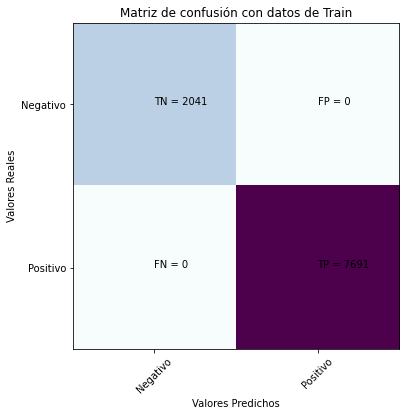

In [31]:
# graficamos la matriz de confusión con datos de prueba
plt.figure(figsize=(10,6))  
plt.clf()
plt.imshow(mtx_confusion_trainGD, interpolation='nearest', cmap=plt.cm.BuPu)#Orangescmap=plt.mtx_confusion_test.Wistia from matplotlib.colors import ListedColormap
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión con datos de Train')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(mtx_confusion_trainGD[i][j]))
plt.show()

In [32]:
# Imrpimimos las métricas más comunes (Ac: accuracy, Pr:precisión, Re: recall, F1, CM:matriz de confusión)
print('Resultados obtenidos en Prueba')
print('------------------------------------------------------------')
print(classification_report(y_test, y_test_predictGD, digits=4))

Resultados obtenidos en Prueba
------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       473
           1     1.0000    1.0000    1.0000      1960

    accuracy                         1.0000      2433
   macro avg     1.0000    1.0000    1.0000      2433
weighted avg     1.0000    1.0000    1.0000      2433



In [33]:
# cálculo
print('matriz de confusión')
mtx_confusion_testGD= confusion_matrix(y_test, y_test_predictGD)
print(mtx_confusion_testGD)

matriz de confusión
[[ 473    0]
 [   0 1960]]


**Gráfico**

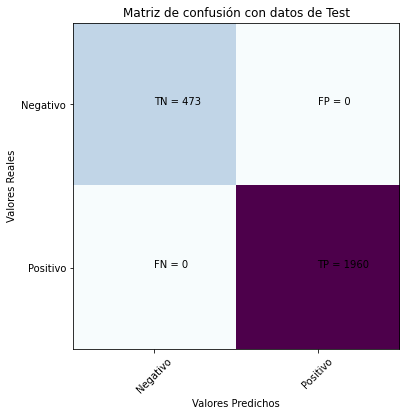

In [35]:
# graficamos la matriz de confusión con datos de prueba
plt.figure(figsize=(10,6))  
plt.clf()
plt.imshow(mtx_confusion_testGD, interpolation='nearest', cmap=plt.cm.BuPu)#Orangescmap=plt.mtx_confusion_test.Wistia from matplotlib.colors import ListedColormap
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión con datos de Test')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(mtx_confusion_testGD[i][j]))
plt.show()

**Ejercicio 2.2: Ajuste de Hiperparámetros**

In [54]:
modelGD2 = SGDClassifier(random_state=0)

In [55]:
param_grid_GD2 = {
  'learning_rate': ['optimal','constant', 'adaptive'],  #diferents opciones de tasa de entrenamiento
  'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge'], #diferentes opciones de función de costo
  'l1_ratio': list(np.linspace(0, 1, 11))+[0.15], # diferentes opciones de tasas de regularización
  'alpha': np.logspace(-5, 0, 6),
  'eta0': np.logspace(-5, 0, 6)
} # se podrían agregar nuevos parámetros para buscar mejores modelos, estas opciones no brindan los mejores resultados

In [38]:
from sklearn.model_selection import ParameterSampler

for params in ParameterSampler(param_grid_GD2, 4, random_state=0):
    print(params)


{'loss': 'hinge', 'learning_rate': 'adaptive', 'l1_ratio': 0.15, 'eta0': 1e-05, 'alpha': 0.01}
{'loss': 'squared_hinge', 'learning_rate': 'optimal', 'l1_ratio': 0.1, 'eta0': 1e-05, 'alpha': 0.01}
{'loss': 'log', 'learning_rate': 'adaptive', 'l1_ratio': 0.5, 'eta0': 1.0, 'alpha': 0.0001}
{'loss': 'hinge', 'learning_rate': 'optimal', 'l1_ratio': 0.8, 'eta0': 0.1, 'alpha': 0.01}


**Entrenamiento**

In [56]:
modelGD2.fit(X_train, y_train);

**Predicción**

In [57]:
y_train_predictGD2 = modelGD2.predict(X_train)
y_test_predictGD2 = modelGD2.predict (X_test)

**Utilizo gridsearchCV para probar las diferentes combinaciones**

In [96]:
grid_gd2 = GridSearchCV(modelGD2, param_grid_GD2, cv=5, scoring=['accuracy'], refit= False) #sino ponfo refit en false genera error
grid_gd2.fit(X_train, y_train) 
# probar con refit= True
# probar agregando otros scoring como precision, recall y f1
# considerar aumentar el número máximo de iteraciones para mejorar el fit.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mo

GridSearchCV(cv=5, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=0,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, ver...
                         'eta0': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'l1_ratio': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4,
                                      0.5, 0.6000000000000001,
                                      0.7000000000000001, 0.8, 0.9, 1.0, 0.15],
    

In [93]:
# prueba con refit en True y otro scoring
 grid_gd3 = GridSearchCV(modelGD2, param_grid_GD2, cv=5, scoring=['accuracy','precision'], refit= False)
 grid_gd3.fit(X_train, y_train) 

KeyboardInterrupt: ignored

In [97]:
# A los resultados lo guardamos como dataframe
grid_gd2_df = pd.DataFrame(grid_gd2.cv_results_)

In [98]:
grid_gd2_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_eta0', 'param_l1_ratio', 'param_learning_rate',
       'param_loss', 'params', 'split0_test_accuracy', 'split1_test_accuracy',
       'split2_test_accuracy', 'split3_test_accuracy', 'split4_test_accuracy',
       'mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy'],
      dtype='object')

In [99]:
grid_gd2_df
# grid_gd2_df.shape: dataframe de 5184 filas y 18 columnas

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_l1_ratio,param_learning_rate,param_loss,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy
0,0.010503,0.001341,0.000948,0.000069,1e-05,1e-05,0,optimal,hinge,"{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0....",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
1,0.019174,0.002000,0.001021,0.000089,1e-05,1e-05,0,optimal,log,"{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0....",1.000000,1.000000,0.994347,1.000000,1.000000,0.998869,0.002261,3973
2,0.010803,0.000977,0.000947,0.000034,1e-05,1e-05,0,optimal,modified_huber,"{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0....",0.999486,0.999486,1.000000,1.000000,0.999486,0.999692,0.000252,3457
3,0.011917,0.000894,0.000934,0.000033,1e-05,1e-05,0,optimal,squared_hinge,"{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0....",0.999486,1.000000,0.999486,0.999486,0.998972,0.999486,0.000325,3841
4,0.030934,0.001522,0.001092,0.000035,1e-05,1e-05,0,constant,hinge,"{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0....",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,0.023044,0.005081,0.001094,0.000048,1,1,0.15,constant,squared_hinge,"{'alpha': 1.0, 'eta0': 1.0, 'l1_ratio': 0.15, ...",0.789933,0.209553,0.790339,0.790339,0.790339,0.674101,0.232274,5161
5180,0.082771,0.001973,0.001141,0.000010,1,1,0.15,adaptive,hinge,"{'alpha': 1.0, 'eta0': 1.0, 'l1_ratio': 0.15, ...",1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1
5181,0.138225,0.007386,0.001116,0.000039,1,1,0.15,adaptive,log,"{'alpha': 1.0, 'eta0': 1.0, 'l1_ratio': 0.15, ...",0.794042,0.794042,0.791367,0.790339,0.792909,0.792540,0.001474,5077
5182,0.095223,0.011959,0.001158,0.000046,1,1,0.15,adaptive,modified_huber,"{'alpha': 1.0, 'eta0': 1.0, 'l1_ratio': 0.15, ...",1.000000,1.000000,1.000000,0.999486,1.000000,0.999897,0.000206,2797


In [100]:
# Seleccionamos las columnas que serán útiles para elegir las configuraciones con mejor performance
gd2_df = grid_gd2_df [['param_alpha', 'param_eta0', 'param_l1_ratio', 'param_learning_rate',
       'param_loss', 'params','mean_test_accuracy', 'std_test_accuracy', 'rank_test_accuracy']]

In [101]:
# Selecciono aquel con con menor valor en 'rank_test_accuracy'

gd2_con_accuracy= gd2_df.loc[gd2_df.rank_test_accuracy.idxmin()]

print('---------------------------------------------------------------------------------------------------------'
      '\n Puntaje y parámetros correspondiente al modelo con mejor performance según:'
      '\n ------------------------------------------------------------------------------------------------------'
      '\n Accuracy  {:.4f}:{}\n'.format(
      gd2_con_accuracy.mean_test_accuracy, gd2_con_accuracy.params),
      '\n------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------
 Puntaje y parámetros correspondiente al modelo con mejor performance según:
 ------------------------------------------------------------------------------------------------------
 Accuracy  1.0000:{'alpha': 1e-05, 'eta0': 1e-05, 'l1_ratio': 0.0, 'learning_rate': 'optimal', 'loss': 'hinge'}
 
------------------------------------------------------------------------------------------------------


In [102]:
gradiente_descendente_ac = SGDClassifier(**gd2_con_accuracy.params, random_state=0)

**Entrenamiento con los parámetros del mejor puntaje respecto a accuracy**

In [103]:
gradiente_descendente_ac.fit(X_train, y_train)

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1e-05, fit_intercept=True,
              l1_ratio=0.0, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

**Predicción**

In [104]:
y_train_pred_gradiente_desc = gradiente_descendente_ac.predict(X_train)
y_test_pred_gradiente_desc = gradiente_descendente_ac.predict(X_test)

In [105]:
# Calculamos las métricas más comunes (Ac: accuracy, Pr:precisión, Re: recall, F1, CM:matriz de confusión)
print('Resultados obtenidos en Prueba')
print('------------------------------------------------------------')
print(classification_report(y_train, y_train_pred_gradiente_desc, digits=4))

Resultados obtenidos en Prueba
------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      2041
           1     1.0000    1.0000    1.0000      7691

    accuracy                         1.0000      9732
   macro avg     1.0000    1.0000    1.0000      9732
weighted avg     1.0000    1.0000    1.0000      9732



In [106]:
# Calculamos las métricas más comunes (Ac: accuracy, Pr:precisión, Re: recall, F1, CM:matriz de confusión)
print('Resultados obtenidos en Prueba')
print('------------------------------------------------------------')
print(classification_report(y_test, y_test_pred_gradiente_desc, digits=4))

Resultados obtenidos en Prueba
------------------------------------------------------------
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       473
           1     1.0000    1.0000    1.0000      1960

    accuracy                         1.0000      2433
   macro avg     1.0000    1.0000    1.0000      2433
weighted avg     1.0000    1.0000    1.0000      2433



No se obtuvieron mejores valores que con los parámetros por defecto así que deberíamos agregar otros scorings entre los prarámetros seleccionados y refit a True.

**Ejercicio 3: Árboles de Decisión**

In [80]:
arbol_decision = DecisionTreeClassifier(random_state=0)

print('Parámetros utilizados: \n', np.array(list(arbol_decision.get_params(deep=False).items())))

Parámetros utilizados: 
 [['ccp_alpha' 0.0]
 ['class_weight' None]
 ['criterion' 'gini']
 ['max_depth' None]
 ['max_features' None]
 ['max_leaf_nodes' None]
 ['min_impurity_decrease' 0.0]
 ['min_impurity_split' None]
 ['min_samples_leaf' 1]
 ['min_samples_split' 2]
 ['min_weight_fraction_leaf' 0.0]
 ['presort' 'deprecated']
 ['random_state' 0]
 ['splitter' 'best']]


**Entrenamiento**

In [81]:
arbol_decision.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predicción**

In [82]:
y_train_pred_arbolD = arbol_decision.predict(X_train)
y_test_pred_arbolD  = arbol_decision.predict(X_test)

**Valores máximos de profundidad y cantidad de hojas máxima**

In [84]:
print('Profundidad máxima del árbol:', arbol_decision.get_depth())
print('Cantidad máxima de hojas:', arbol_decision.get_n_leaves())

Profundidad máxima del árbol: 1
Cantidad máxima de hojas: 2


**Gráficos**

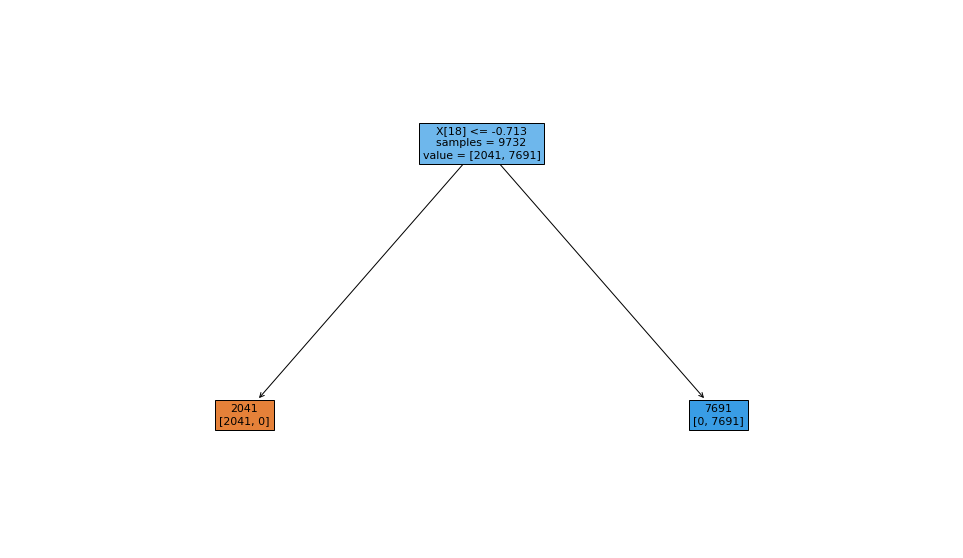

In [87]:
# árbol sin especificar el nro. de ramas
plt.figure(figsize=(17,10))
plot_tree(arbol_decision, impurity=False, fontsize=11, filled=True, label='root')  #filled=True,
plt.show()

In [111]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot


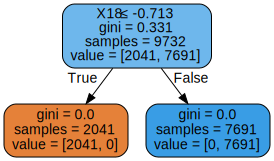

In [124]:
# otra opción de gráficos
import graphviz
from sklearn import tree

from sklearn import tree
from sklearn import datasets
from sklearn import model_selection

dot_data = tree.export_graphviz(arbol_decision, out_file=None, 
                         #feature_names=datos_curados.feature_names,  
                         #class_names= datos_curados.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Métricas**

In [88]:
# Calculamos las métricas más comunes (Ac: accuracy, Pr:precisión, Re: recall, F1, CM:matriz de confusión)
print('Resultados obtenidos en Entrenamiento')
print('------------------------------------------------------------')
print(classification_report(y_train, y_train_pred_arbolD, digits=3))

Resultados obtenidos en Entrenamiento
------------------------------------------------------------
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      2041
           1      1.000     1.000     1.000      7691

    accuracy                          1.000      9732
   macro avg      1.000     1.000     1.000      9732
weighted avg      1.000     1.000     1.000      9732



**Matriz de confusión**

In [89]:
print('Matriz de confusión con datos de entrenamiento')
mtx_confusion_train_arbolD= confusion_matrix(y_train, y_train_pred_arbolD)
print(mtx_confusion_train_arbolD)

Matriz de confusión con datos de entrenamiento
[[2041    0]
 [   0 7691]]


**Gráfico**

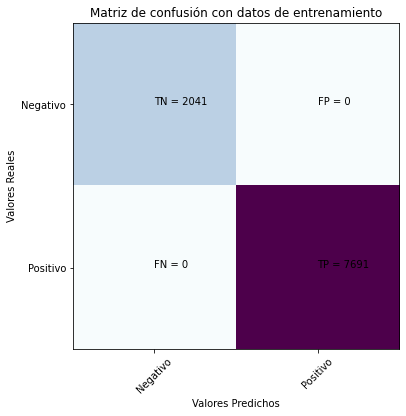

In [90]:
# graficamos la matriz de confusión con datos de train o entrenamiento
plt.figure(figsize=(10,6))  
plt.clf()
plt.imshow(mtx_confusion_train_arbolD, interpolation='nearest', cmap=plt.cm.BuPu)#Orangescmap=plt.mtx_confusion_test.Wistia from matplotlib.colors import ListedColormap
classNames = ['Negativo','Positivo']
plt.title('Matriz de confusión con datos de entrenamiento')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(mtx_confusion_train_arbolD[i][j]))
plt.show()

Teniendo en cuenta los resultados obtenidos aplicando el algoritmo del gradiente descendiente y árboles de decisión, en ambos casos con parámetros por defecto, se evidencian resultados similares por lo ninguno ofrece mejoras de performance sobre el otro.

### Ejercicio 3.2: Ajuste de Hiperparámetros

In [125]:
arbol_decision_con_param = DecisionTreeClassifier(random_state=0)

**Opciones de parámetros**

In [126]:
param_arbol_decision = [
  {'splitter': ['best'],
          'criterion': ['gini', 'entropy'],
          'max_depth': list(np.arange(4,20,2)),
          'min_samples_leaf': np.arange(1,10)
          },
  {'splitter': ['random'],
          'criterion': ['gini', 'entropy'],
          'max_depth': list(np.arange(4,20,2)),
          'min_samples_leaf': np.arange(1,10)
          }
]

**Utilizamos grid-search con 5-fold cross-validation**



In [127]:
grid_ad = GridSearchCV(arbol_decision_con_param, param_arbol_decision, cv=5, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'], refit=False)
grid_ad.fit(X_train, y_train);

In [128]:
# los resultados de la búsqueda lo guardamos como dataframe
arbol_decision_con_param_df = pd.DataFrame(grid_ad.cv_results_)

In [129]:
arbol_decision_con_param_df  # 288 filas por 41

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_splitter,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,split4_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_precision_weighted,split1_test_precision_weighted,split2_test_precision_weighted,split3_test_precision_weighted,split4_test_precision_weighted,mean_test_precision_weighted,std_test_precision_weighted,rank_test_precision_weighted,split0_test_recall_weighted,split1_test_recall_weighted,split2_test_recall_weighted,split3_test_recall_weighted,split4_test_recall_weighted,mean_test_recall_weighted,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,0.007729,0.001393,0.004735,0.000458,gini,4,1,best,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.006988,0.000607,0.005032,0.001043,gini,4,2,best,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.006724,0.000032,0.004446,0.000144,gini,4,3,best,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.006913,0.000099,0.004560,0.000109,gini,4,4,best,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.006695,0.000025,0.004418,0.000123,gini,4,5,best,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.003064,0.000031,0.004392,0.000101,entropy,18,5,random,"{'criterion': 'entropy', 'max_depth': 18, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
284,0.003059,0.000054,0.004372,0.000109,entropy,18,6,random,"{'criterion': 'entropy', 'max_depth': 18, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
285,0.003079,0.000084,0.004375,0.000131,entropy,18,7,random,"{'criterion': 'entropy', 'max_depth': 18, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
286,0.002981,0.000033,0.004397,0.000124,entropy,18,8,random,"{'criterion': 'entropy', 'max_depth': 18, 'min...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [130]:
# Seleccionamos las columnas que serán útiles para elegir las configuraciones con mejor performance
arbol_decision_con_param_df = arbol_decision_con_param_df[['param_criterion', 'param_max_depth',
                              'param_min_samples_leaf', 'param_splitter', 'params', 'mean_test_accuracy', 
                              'std_test_accuracy', 'rank_test_accuracy','mean_test_precision_weighted','std_test_precision_weighted',
                              'rank_test_precision_weighted', 'mean_test_recall_weighted','std_test_recall_weighted',
                               'rank_test_recall_weighted', 'mean_test_f1_weighted', 'std_test_f1_weighted', 'rank_test_f1_weighted']]

In [131]:
# Seleccionamos los que tienen mejores valores para acurracy, precision, recall y f1.

arbol_decision_según_accuracy = arbol_decision_con_param_df.loc[arbol_decision_con_param_df.rank_test_accuracy.idxmin()]
arbol_decision_según_precision = arbol_decision_con_param_df.loc[arbol_decision_con_param_df.rank_test_precision_weighted.idxmin()]
arbol_decision_según_recall = arbol_decision_con_param_df.loc[arbol_decision_con_param_df.rank_test_recall_weighted.idxmin()]
arbol_decision_según_f1 = arbol_decision_con_param_df.loc[arbol_decision_con_param_df.rank_test_f1_weighted.idxmin()]
#
print('-------------------------------------------------------------------------------'
      '\n Puntaje y parámetros correspondiente a los modelos con mejor performance según:'
      '\n ------------------------------------------------------------------------------'
      '\n Accuracy  {:.4f}: {}\n Precision {:.4f}: {}\n Recall    {:.4f}: {}'
      '\n F1-Score  {:.4f}: {}\n'.format(
          arbol_decision_según_accuracy.mean_test_accuracy, arbol_decision_según_accuracy.params,
          arbol_decision_según_precision.mean_test_precision_weighted, arbol_decision_según_precision.params,
          arbol_decision_según_recall.mean_test_recall_weighted, arbol_decision_según_recall.params,
          arbol_decision_según_f1.mean_test_f1_weighted, arbol_decision_según_f1.params),
      '-------------------------------------------------------------------------------')

-------------------------------------------------------------------------------
 Puntaje y parámetros correspondiente a los modelos con mejor performance según:
 ------------------------------------------------------------------------------
 Accuracy  1.0000: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}
 Precision 1.0000: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}
 Recall    1.0000: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}
 F1-Score  1.0000: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'splitter': 'best'}
 -------------------------------------------------------------------------------


De acuerdo a los valores obtenidos en el punto anterior, ejecutamos el algoritmo 'DecisionTreeClassifier' utilizando los parámetros obtenidos para accuracy:

In [132]:
arbol_decision_ac = DecisionTreeClassifier(**arbol_decision_según_accuracy.params, random_state=0)

**Entrenamiento**

In [133]:
arbol_decision_ac.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**Predicción**

In [134]:
y_train_pred_arbol_ac = arbol_decision_ac.predict(X_train)
y_test_pred_arbol_ac = arbol_decision_ac.predict(X_test)

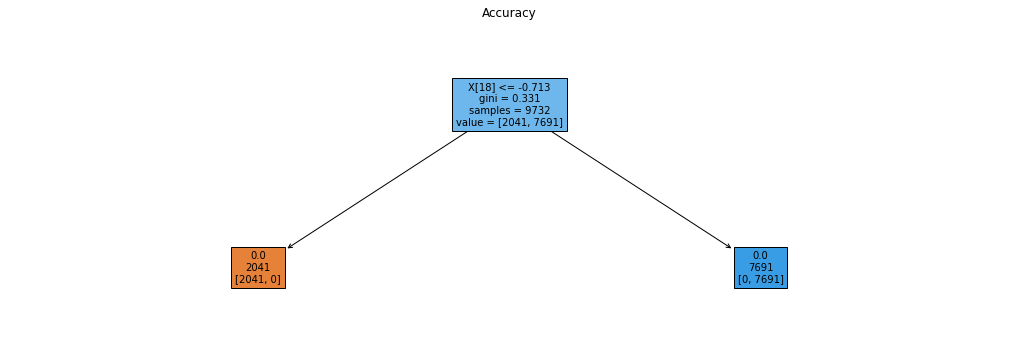

In [135]:
# arbol generado por el modelo 'arbol_decision_ac' con 4 ramas de profundidad
plt.figure(figsize=(18,6))
plot_tree(arbol_decision_ac, filled=True, max_depth= 4, fontsize=10, label='root')
plt.title('Accuracy')
plt.show()